In [47]:
import pandas as pd
import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sn
import numpy as np

def imputate_data(df):
    df.dropna(axis=1, how='all', inplace=True)

    df1 = df.filter(regex='id')
    df1.fillna(df1.mode().iloc[0], axis=0, inplace=True)

    df.fillna(df.mean(), axis=0, inplace=True)
    df[list(df1.keys())] = df1

def encode_objects(df):
    for f in df.columns:
        if df[f].dtype=='object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df[f].values))
            df[f] = lbl.transform(list(df[f].values))

def split_merged(df):
    Y = df.logerror.values
    X = df.drop(["parcelid", "transactiondate", "logerror"], axis=1)
    return X, Y

In [15]:
print("Loading data...")
transactions = pd.read_csv('data/train_2016_v2.csv', parse_dates=['transactiondate'])
test_transactions = pd.read_csv('data/train_2017.csv', parse_dates=['transactiondate'])
properties = pd.read_csv('data/properties_2016.csv')
test_properties = pd.read_csv('data/properties_2017.csv')
print("Done.")
print("-------------------------------------------------------------------")

print("Parsing data...")
merged = pd.merge(transactions, properties, on="parcelid", how="left")
test_merged = pd.merge(test_transactions, test_properties, on="parcelid", how="left")

imputate_data(merged)
imputate_data(test_merged)

encode_objects(merged)
encode_objects(test_merged)

X, Y = split_merged(merged)
X_test, Y_test = split_merged(test_merged)

split_index = round(len(X)*0.7) # 70-30 training/validation split
X_train, Y_train, X_validate, Y_validate = (X[:split_index], Y[:split_index],
                                            X[split_index:], Y[split_index:])
print("Done.")
print("-------------------------------------------------------------------")

Loading data...


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done.
-------------------------------------------------------------------
Parsing data...
Done.
-------------------------------------------------------------------


In [121]:
model = pickle.load(open("models/model50-20-0.05.p", "rb"))
print(model.score(X_train, Y_train))
print(mean_squared_error(Y_test, model.predict(X_test)))

print(model.feature_importances_)

0.725133666115
0.0372651586965
[  1.43101271e-03   3.24039776e-05   1.82121431e-04   9.72919017e-03
   1.90534997e-02   0.00000000e+00   9.38766585e-03   7.67401356e-03
   0.00000000e+00   3.35098934e-03   4.40298297e-02   4.76188026e-02
   7.95418240e-05   1.32135296e-02   3.65740370e-03   3.34788235e-03
   6.88906007e-04   2.75358205e-03   5.93061586e-03   2.61360002e-03
   1.28025853e-02   0.00000000e+00   4.19231240e-03   8.38020315e-02
   9.04777524e-02   8.07409658e-02   0.00000000e+00   3.99745366e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   9.04151941e-03
   6.67765759e-03   2.60627514e-02   2.43800386e-02   2.10868418e-02
   7.99185254e-04   2.61334454e-02   3.94005410e-02   5.23667484e-03
   0.00000000e+00   1.83875111e-03   0.00000000e+00   2.82787973e-03
   3.63529635e-03   2.48480840e-04   4.93689082e-02   3.22832590e-03
   0.00000000e+00   8.27600593e-02   6.39228897e-02   0.00000000e+00
   7.53081248e-02   8.08111422e-02   1.09972485e-03   3.99262584e-03
   

[]

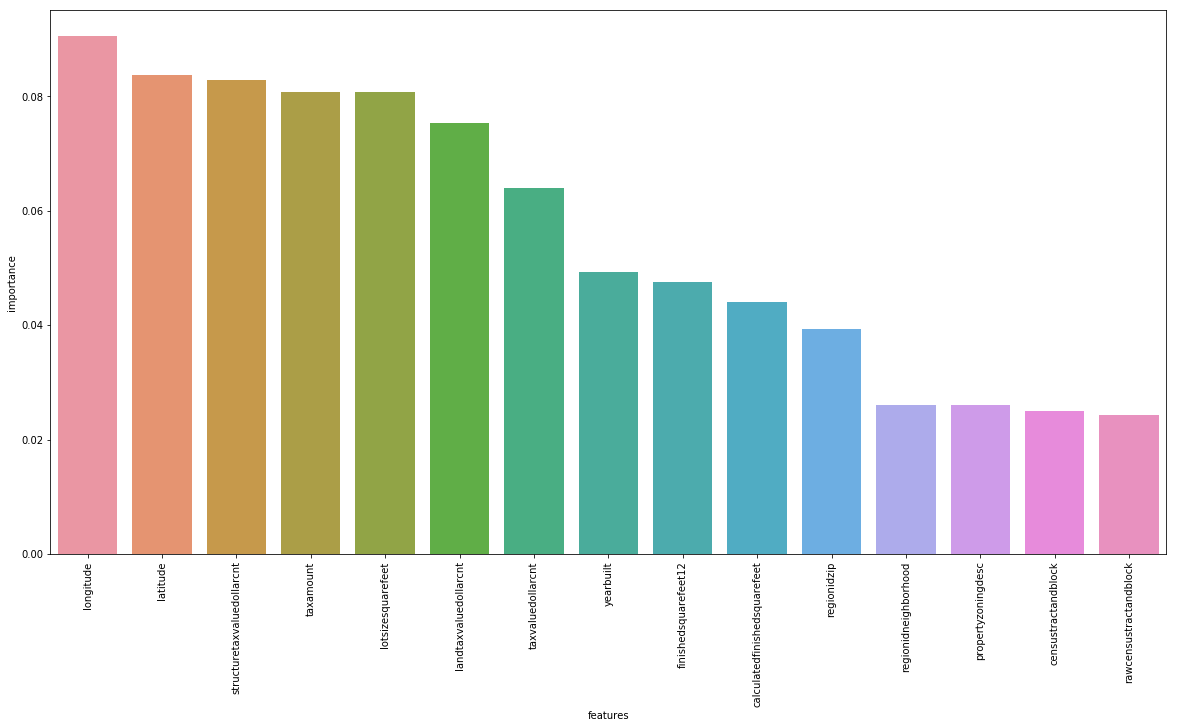

In [122]:
import matplotlib.pyplot as plt

features = pd.DataFrame()
features['features'] = X.keys()
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'],ascending=False,inplace=True)

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
ax = sn.barplot(x="features", y="importance", data=features.head(15))
ax.plot()